In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import the dataset

data = pd.read_csv('adult.csv', header=0, names=['age','workclass','fnlwgt','education','education-num', 'marital-status',
                                              'occupation','relationship','race','sex','capital-gain','capital-loss',
                                              'hours-per-week','native-country', 'salary'])
# change the path as necessary

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [6]:
categorical_data = data.select_dtypes(include='object')
numerical_data = data.select_dtypes(exclude='object')

In [7]:
categorical_column_names = categorical_data.columns.to_list()
numerical_data_column_names = numerical_data.columns.to_list()

workclass


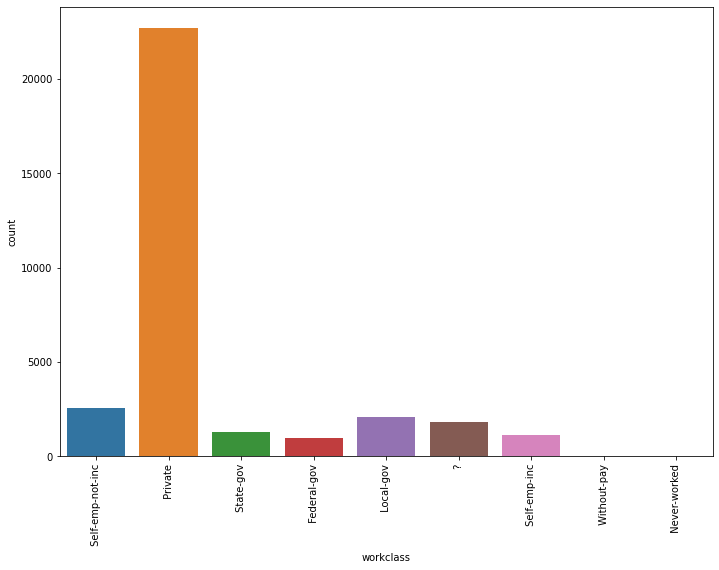

education


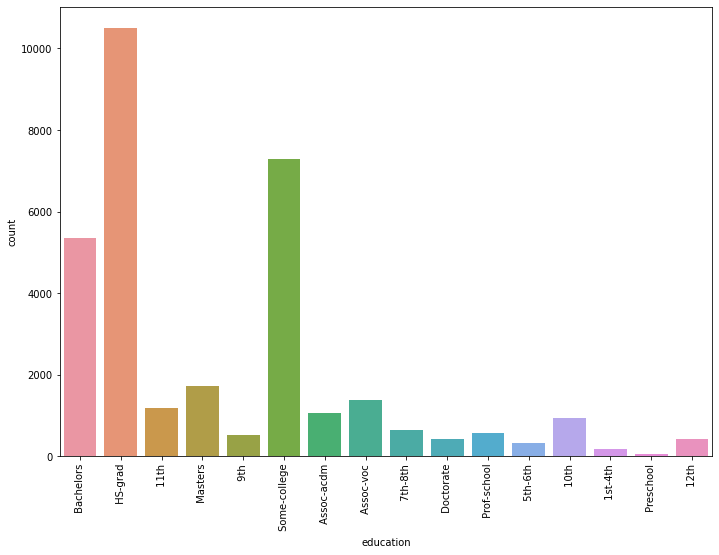

marital-status


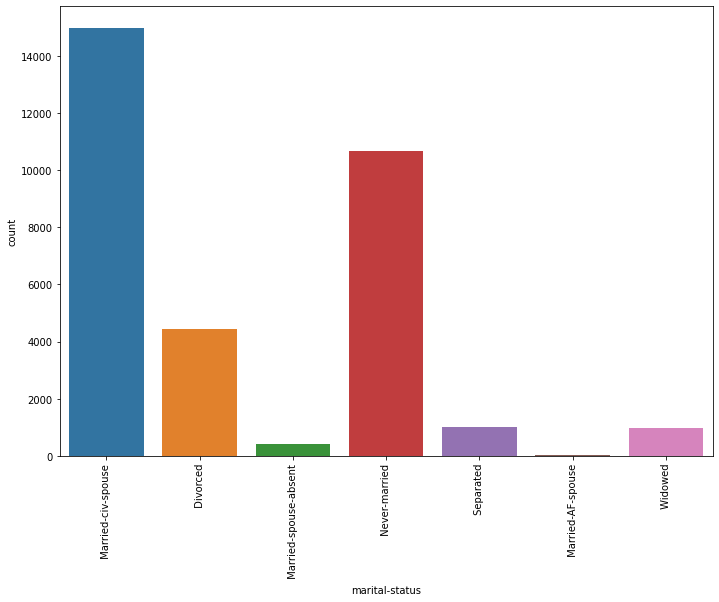

occupation


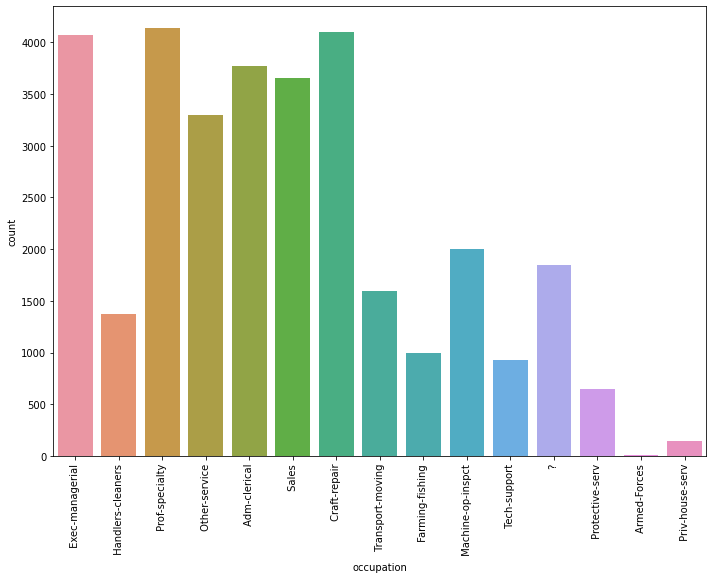

relationship


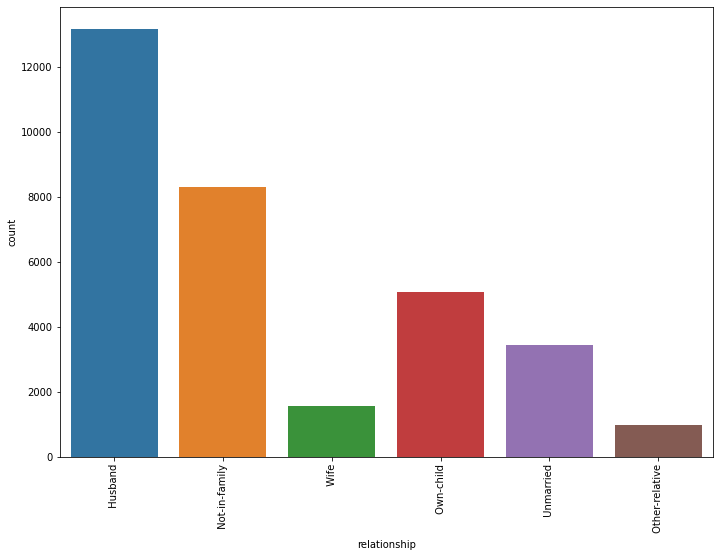

race


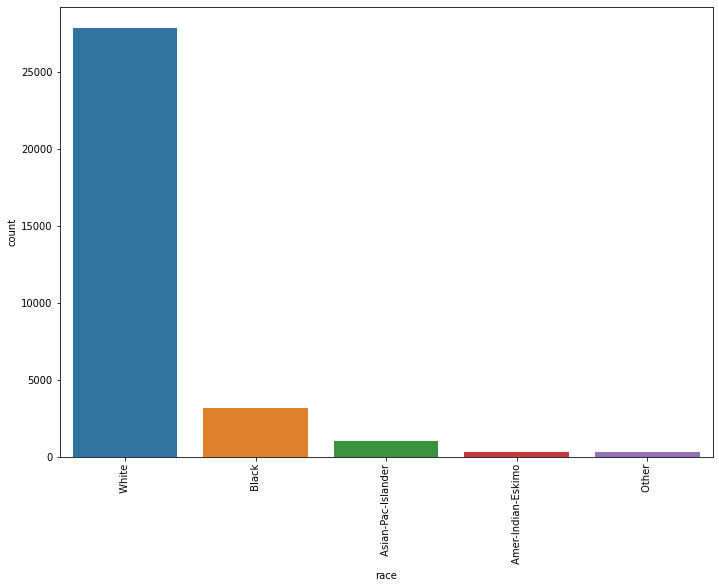

sex


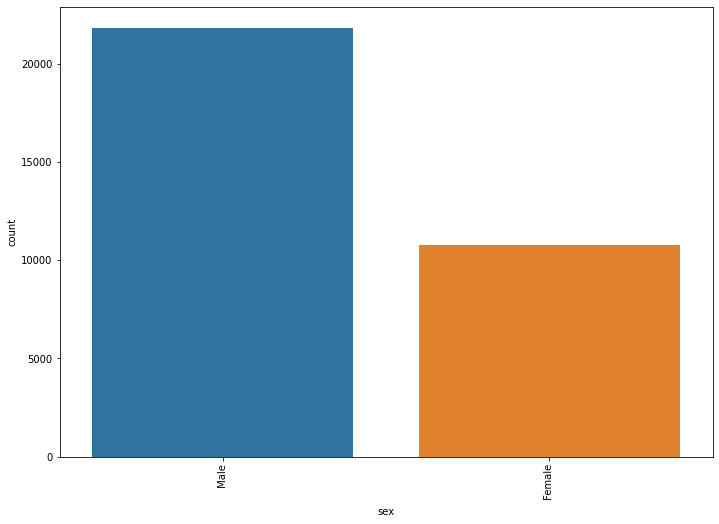

native-country


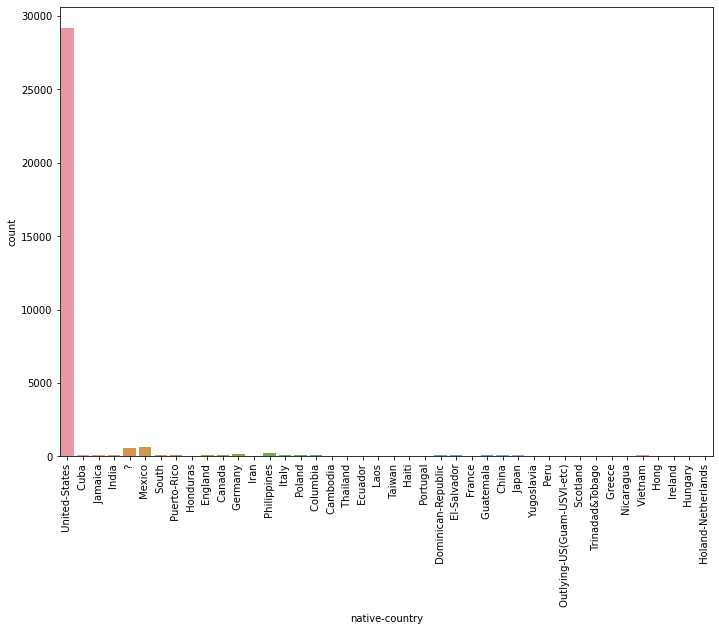

salary


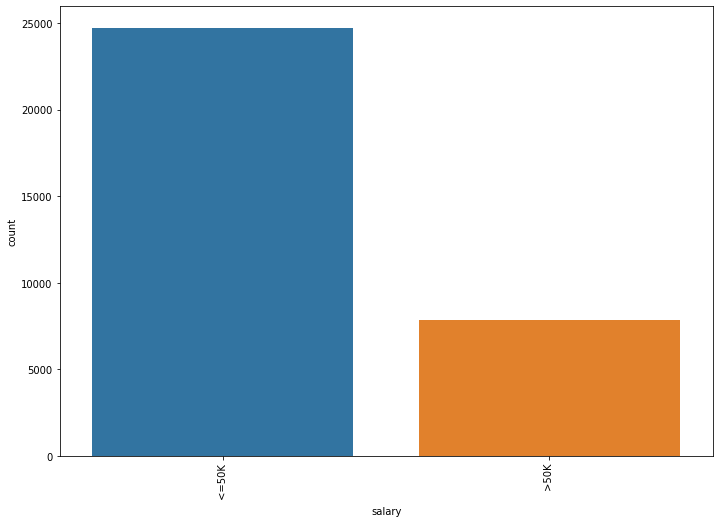

In [8]:
for i in categorical_column_names:
    print(i)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(ax=ax, x=i,data=categorical_data)
    plt.xticks(rotation=90)
    plt.show()

In [9]:
numerical_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

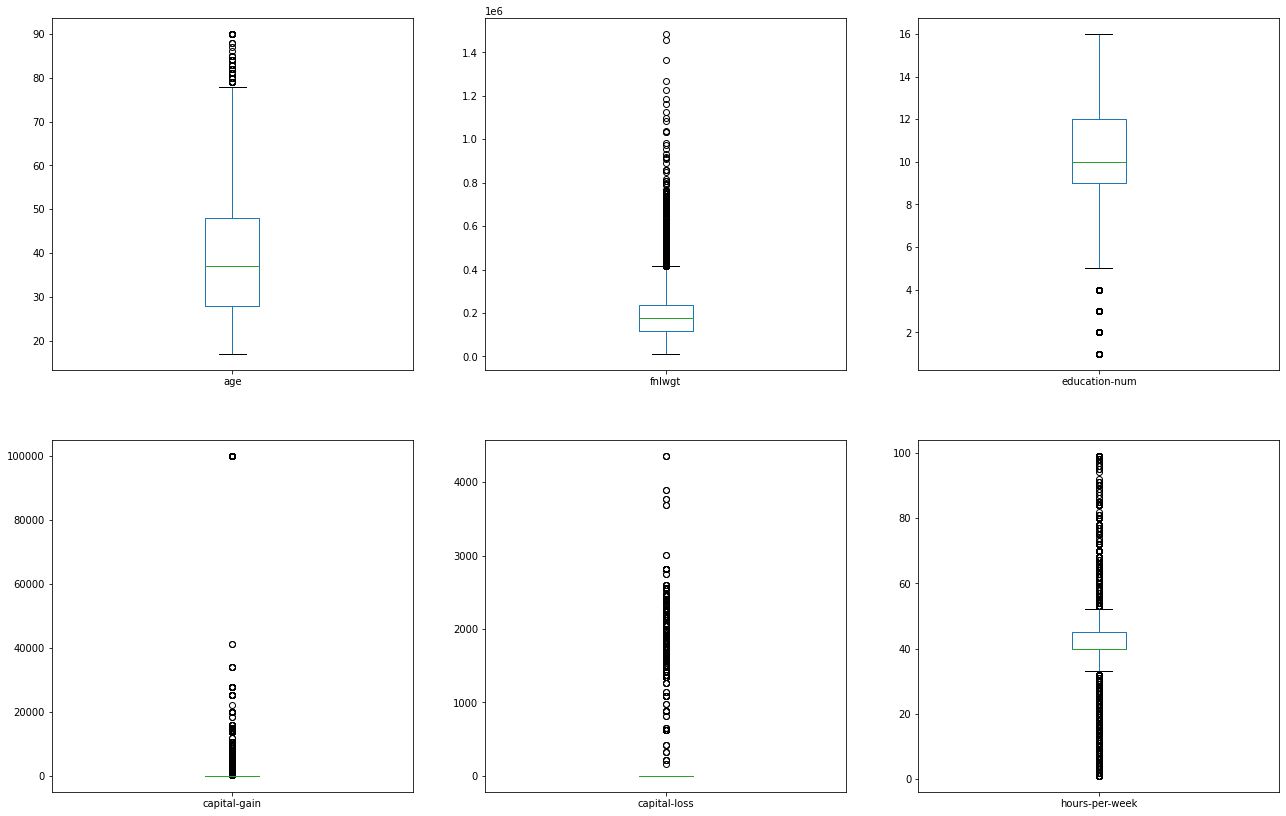

In [10]:
data.plot(kind='box', figsize=(22,22), layout=(3,3), sharex=False, subplots=True)

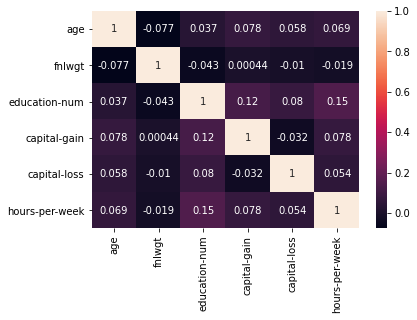

In [11]:
sns.heatmap(data.corr(), annot = True)


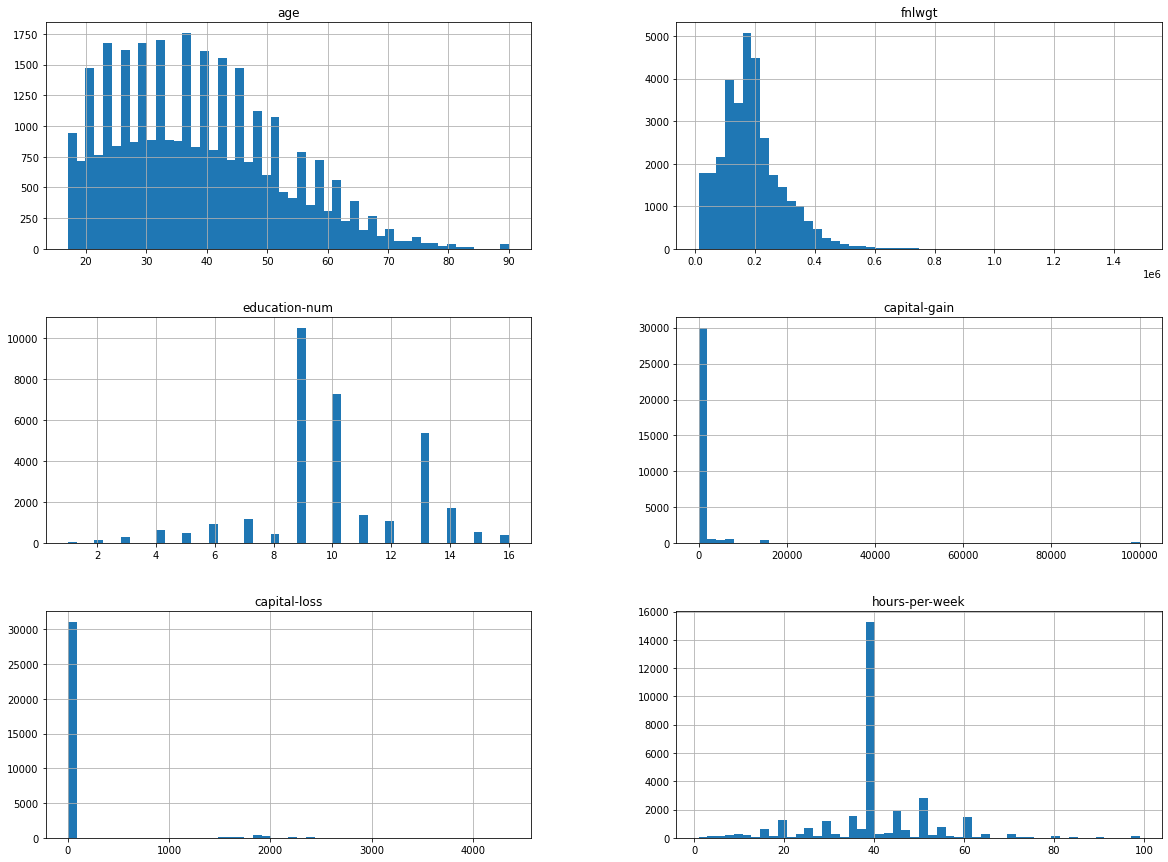

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
numerical_data.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
education-num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
capital-gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
capital-loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [14]:
categorical_data.replace('[\?,)]', np.NaN, regex = True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
categorical_data['workclass'].value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

In [17]:
imputer.fit(categorical_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [18]:
categorical_data = imputer.transform(categorical_data)

In [19]:
categorical_data = pd.DataFrame(categorical_data, columns = categorical_column_names)

In [20]:
categorical_data['salary'].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [21]:
categorical_data['salary'] = categorical_data['salary'].replace('>50K', 1, regex = True)
categorical_data['salary'] = categorical_data['salary'].replace('<=50K', 0, regex = True)

workclass


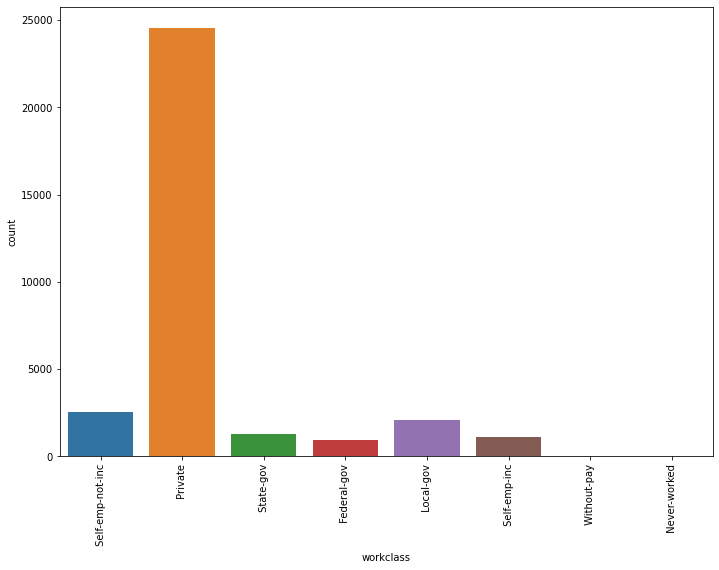

education


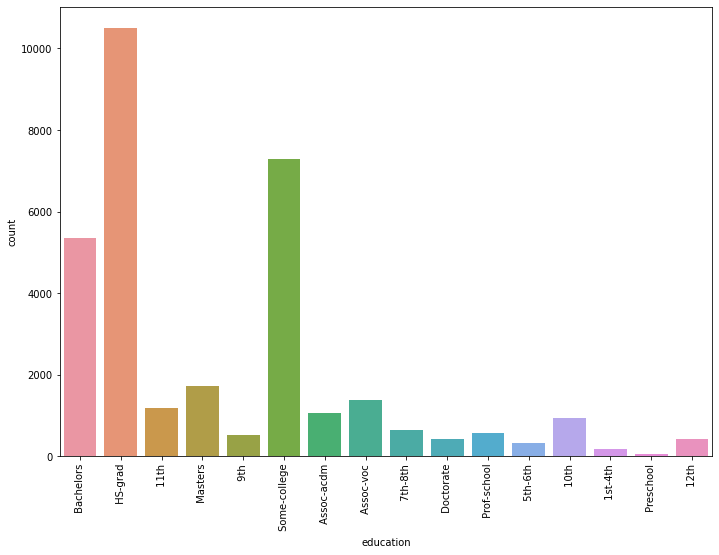

marital-status


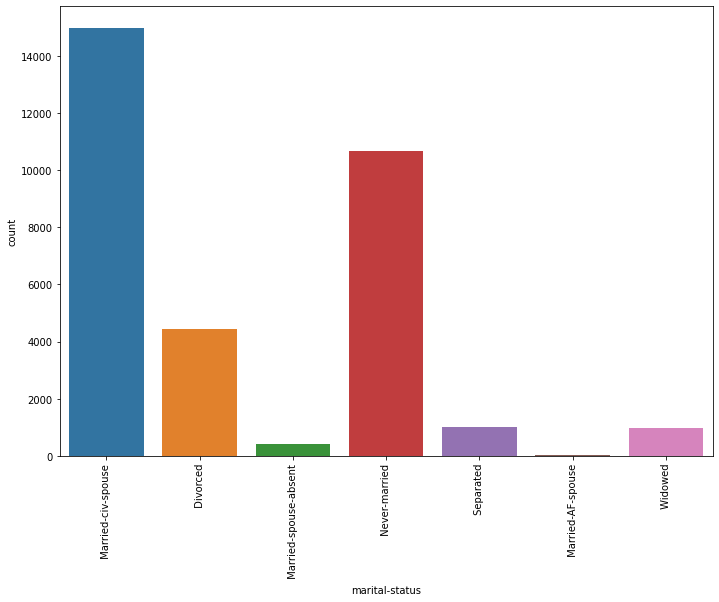

occupation


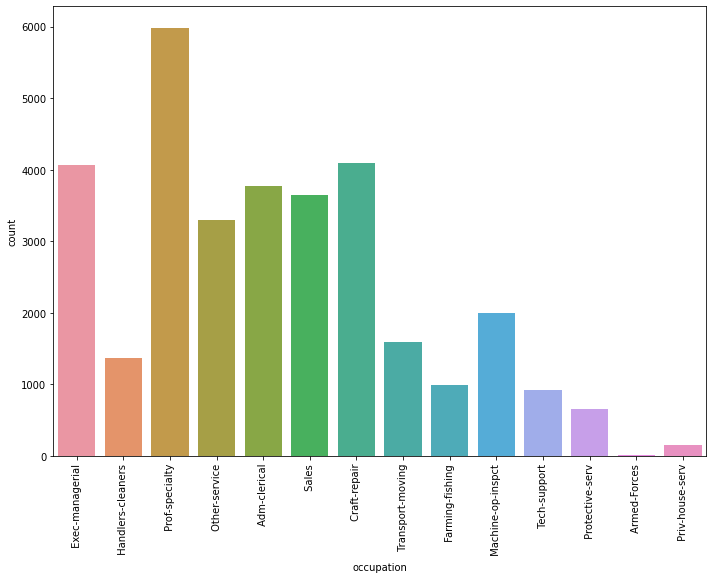

relationship


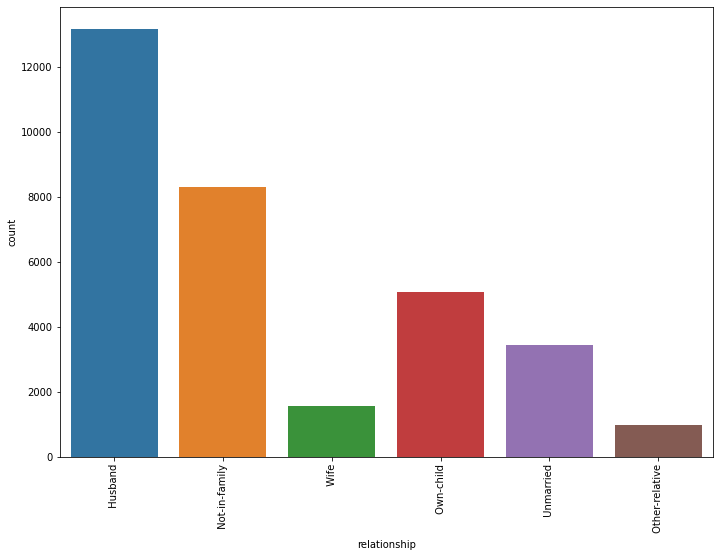

race


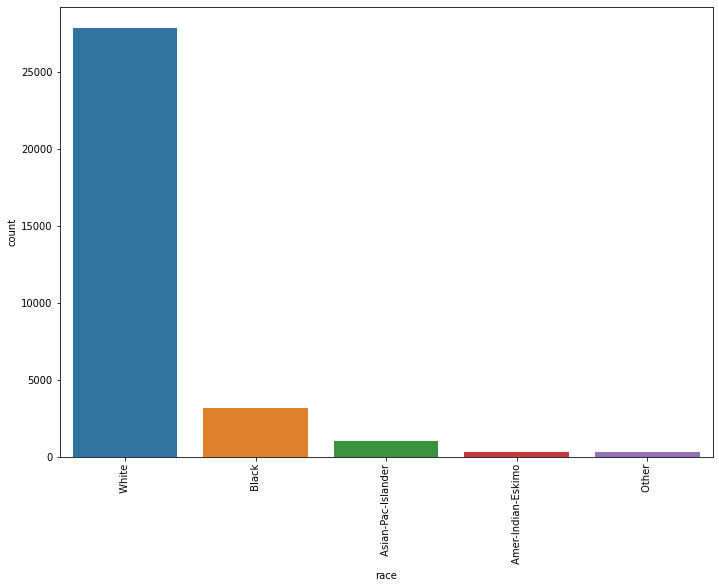

sex


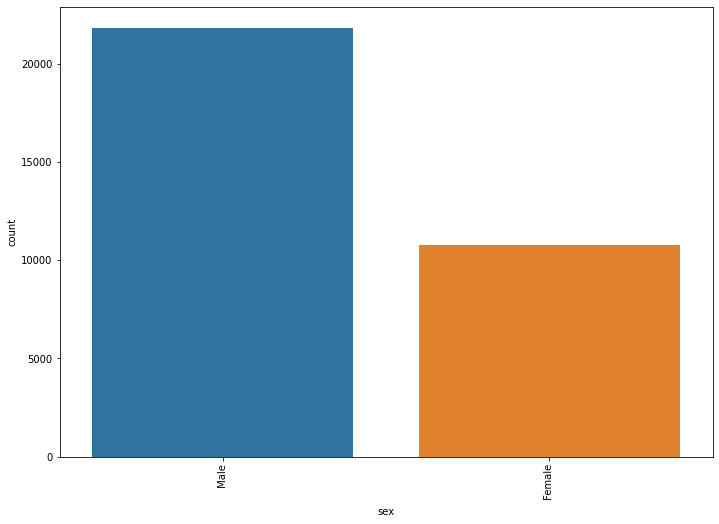

native-country


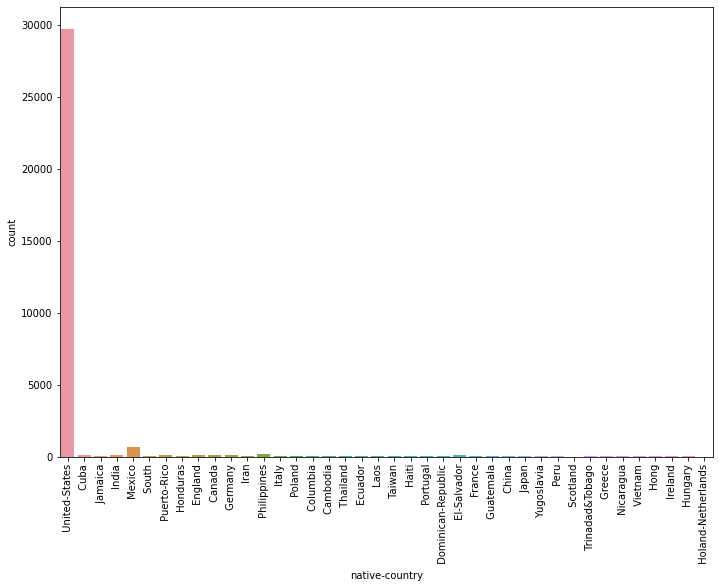

salary


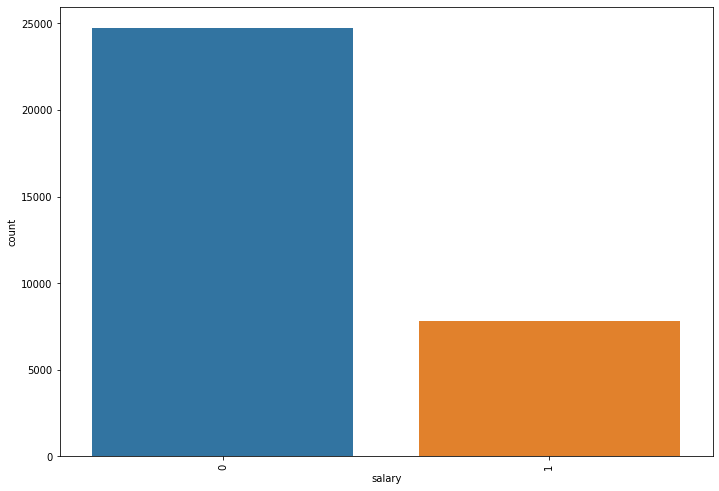

In [22]:
l = categorical_data.columns.to_list()
for i in l:
    print(i)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(ax=ax, x=i,data=categorical_data)
    plt.xticks(rotation=90)
    plt.show()

In [23]:
categorical_data = pd.get_dummies(categorical_data)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
numerical_data = scaler.fit_transform(numerical_data)
numerical_data = pd.DataFrame(numerical_data, columns = numerical_data_column_names)
numerical_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.837097,-1.008742,1.134779,-0.145914,-0.216663,-2.22212
1,-0.042640,0.245046,-0.420027,-0.145914,-0.216663,-0.03543
2,1.057031,0.425770,-1.197429,-0.145914,-0.216663,-0.03543
3,-0.775755,1.408146,1.134779,-0.145914,-0.216663,-0.03543
4,-0.115952,0.898170,1.523480,-0.145914,-0.216663,-0.03543


In [25]:
data_transformed = pd.concat([numerical_data,categorical_data], axis=1)

In [26]:
data_transformed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,...,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.837097,-1.008742,1.134779,-0.145914,-0.216663,-2.22212,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.042640,0.245046,-0.420027,-0.145914,-0.216663,-0.03543,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.057031,0.425770,-1.197429,-0.145914,-0.216663,-0.03543,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.775755,1.408146,1.134779,-0.145914,-0.216663,-0.03543,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.115952,0.898170,1.523480,-0.145914,-0.216663,-0.03543,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split
x = data_transformed.drop('salary',axis=1)
y = data_transformed['salary']
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.99)
# x_train = pca.fit_transform(x_train)
# x_test_reduced = pca.fit_transform(x_test)

In [29]:
# print(x_train.shape)
# print(x_test.shape)
# print(x_train.shape)
# print(x_test_reduced.shape)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = 500)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

print('================== Logistic Regression ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("Root mean square error : ", lin_rmse)

================== Logistic Regression ======================
Accuracy :  0.8502252252252253
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7395
           1       0.73      0.60      0.66      2373

    accuracy                           0.85      9768
   macro avg       0.81      0.77      0.78      9768
weighted avg       0.84      0.85      0.85      9768

Root mean square error :  0.38700746087740323


In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)  
y_pred = gnb.predict(x_test)

In [33]:
print('================== Naive Bayes ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error : ", rmse)

================== Naive Bayes ======================
Accuracy :  0.5315315315315315
              precision    recall  f1-score   support

           0       0.96      0.40      0.56      7395
           1       0.34      0.95      0.50      2373

    accuracy                           0.53      9768
   macro avg       0.65      0.67      0.53      9768
weighted avg       0.81      0.53      0.55      9768

Root mean square error :  0.6844475644404533


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)  
  
clf.fit(x_train, y_train)
  
y_pred = clf.predict(x_test)
  

In [35]:
print('================== Random Forest ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error : ", rmse)

================== Random Forest ======================
Accuracy :  0.8579033579033579
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7395
           1       0.75      0.63      0.68      2373

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.85      0.86      0.85      9768

Root mean square error :  0.37695708256596283


In [36]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [46]:
rf_random.fit(x_train, y_train)
  
y_pred = rf_random.predict(x_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.7min finished


In [47]:
print('================== Random Forest with Randomized Search ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error : ", rmse)

================== Random Forest with Randomized Search ======================
Accuracy :  0.8651719901719902
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7395
           1       0.78      0.63      0.69      2373

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768

Root mean square error :  0.3671893378463076


In [39]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
clf.fit(x, y) 
clf.fit(x_train, y_train)
  
y_pred = clf.predict(x_test)
  

In [40]:
print('================== SVM ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error : ", rmse)

================== SVM ======================
Accuracy :  0.8463349713349714
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7395
           1       0.74      0.57      0.64      2373

    accuracy                           0.85      9768
   macro avg       0.81      0.75      0.77      9768
weighted avg       0.84      0.85      0.84      9768

Root mean square error :  0.3920013120705448


In [41]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(x_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
22792/22792 [==============================] - 43s 1ms/step - loss: 0.3665 - accuracy: 0.8291
Epoch 2/4
22792/22792 [==============================] - 24s 1ms/step - loss: 0.3124 - accuracy: 0.8563
Epoch 3/4
22792/22792 [==============================] - 23s 1ms/step - loss: 0.3087 - accuracy: 0.8549
Epoch 4/4
22792/22792 [==============================] - 23s 1ms/step - loss: 0.3080 - accuracy: 0.8576


In [43]:
y_pred = model.predict_classes(x_test)
score = model.evaluate(x_test, y_test,verbose=1)

print(score)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


306/306 [==============================] - 1s 1ms/step - loss: 0.3215 - accuracy: 0.8558
[0.3214690089225769, 0.855753481388092]


In [44]:
print('================== Neural Network ======================')
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error : ", rmse)

================== Neural Network ======================
Accuracy :  0.8557534807534808
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7395
           1       0.71      0.68      0.70      2373

    accuracy                           0.86      9768
   macro avg       0.81      0.80      0.80      9768
weighted avg       0.85      0.86      0.85      9768

Root mean square error :  0.37979799794959324


In [48]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(6, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 85.27% (0.81%)
